# NTLK Quetes 1

#### Importe NLTK et télécharge les fonctions dont tu auras besoin (au fur et à mesure si nécessaire).
#### Récupère le texte d'un article de presse de ton choix sur internet (en anglais ce sera plus simple, mais tu peux prendre la langue de ton choix). 
#### Affecte-le à une variable via un copier/coller dans ton notebook. Par simplicité pour la suite de cette quête, nous te conseillons de prendre un texte qui fait entre 10 et 30 lignes environ. 
#### Transforme ton texte en tokens de phrases
#### Transforme ton texte en tokens de mots
#### Compte la fréquence d'apparition de chaque mot et réalise un graphique (si possible un diagramme en barre) qui représente les 20 mots les plus présents dans ton texte. Y a-t-il beaucoup de mots qui te semblent être des stopwords ?
#### Enlève les stop words et la ponctuation, et regarde à nouveau quels sont les mots les plus présents. Là encore, réalise le même graphique pour comparer.

In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import os
import io
import random
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import string
import spacy
import plotly.graph_objects as go


In [2]:
# Télécharger le popular plus de 50min!!
# nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
# Télécharger les stopwords en français
nltk.download("stopwords")
# Vérifier que les stopwords en français sont disponibles
print(stopwords.words("french"))

# Télécharger le corpus Punkt pour toekniser les phrases
nltk.download("punkt")
# Vérifier que les stopwords en français sont disponibles


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# !pip install spacy
# !python -m spacy download fr_core_news_sm


  Using cached spacy-3.7.2-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp312-cp312-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp312-cp312-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.2-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.3.4-py3-none-any.whl.metadata (4.7 kB)
  Using cached smart_open-6.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached blis-0.7.11-cp312-cp312-win_amd64.whl.metadata (7.6 kB)
  Using cached confection-0.1.4-py3-none-any.whl.me


 fichier_to_test :
./le_bonheur.txt 


 token_phrases:
['Le bonheur, mes chers amis, est ce phare éternel vers lequel toutes les âmes naviguent avec espoir.', "Mais qu'est-ce que le bonheur, sinon l'harmonie entre l'homme et l'existence qu'il mène ?", "Ce n'est pas un lieu lointain ou un sommet à atteindre, mais plutôt un chemin sur lequel on marche, un ensemble de petits moments, une suite de respirations conscientes.", 'Socrate, dans son humilité, nous a enseigné que la connaissance de soi est la clé de la sagesse et, par extension, du bonheur.', 'Car en se connaissant, on comprend mieux ses désirs et on distingue les plaisirs éphémères des joies durables.', "Épicure, quant à lui, a souligné l'importance des plaisirs simples : le chant des oiseaux, la douceur d'une brise, la compagnie d'un bon ami.", "Il nous a invités à chercher le bonheur dans la modération et dans la liberté des tourments de l'âme.", "Et que dire de Sénèque, ce stoïcien qui a prôné la vertu, la patience et l'acce

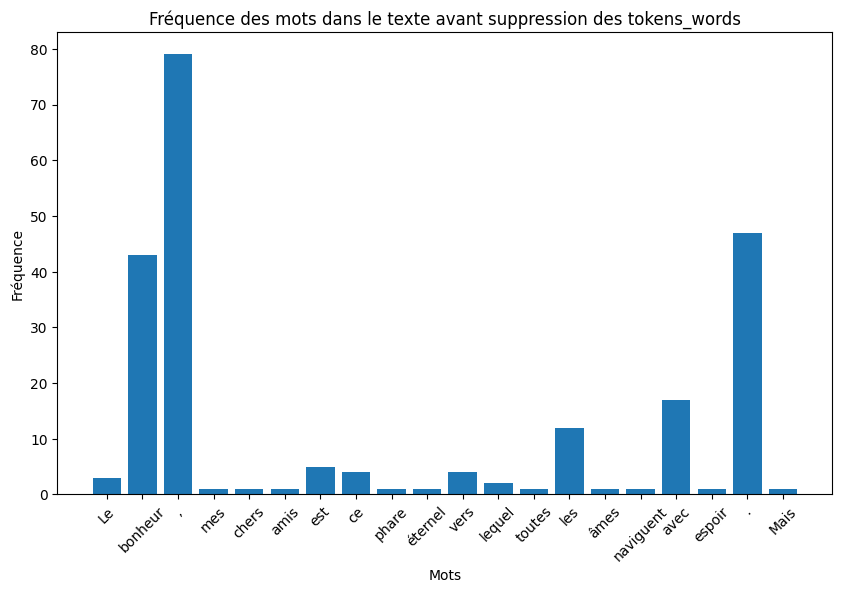

In [5]:
# Définir le chemin d'accès au fichier
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

fichier_to_test = "./le_bonheur.txt"
print(f"\n fichier_to_test :\n{fichier_to_test} \n")

# Lire le fichier
with open(fichier_to_test, "r", encoding="utf-8") as file:
    texte = file.read()

# Tokenisation par phrase, liste les phrases dans le texte
token_phrases = nltk.sent_tokenize(texte)
print(f"\n token_phrases:\n{token_phrases} \n")

# Tokenisation par mots, liste les mots dans le texte
tokens_words = nltk.word_tokenize(texte, language="french")
print(f"\n tokens_words:\n{tokens_words} \n")

# Création de la liste des stop words
stop_words = set(stopwords.words("french"))
print(f"\n stop_words:\n{stop_words} \n")

# Compter la fréquence des mots
freq_tokens_words = Counter(tokens_words)
print(f"\n freq:\n{freq_tokens_words}")

# Préparer les données pour le graphique
mots = list(freq_tokens_words.keys())
frequences = list(freq_tokens_words.values())
print(f"\n mots:\n{len(mots)} \n")
print(f"\n mots:\n{mots} \n")
print(f"\n frequences:\n{frequences} \n")

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
# Affiche les 20 premiers mots pour la lisibilité
plt.bar(mots[:20], frequences[:20])
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.title("Fréquence des mots dans le texte avant suppression des tokens_words")
plt.xticks(rotation=45)
plt.show()



 Tokens nettoyés:
['bonheur', ',', 'chers', 'amis', ',', 'phare', 'éternel', 'vers', 'lequel', 'toutes', 'âmes', 'naviguent', 'espoir', '.', "qu'est-ce", 'bonheur', ',', 'sinon', "l'harmonie", 'entre', "l'homme", "l'existence", "qu'il", 'mène', '?', "n'est", 'lieu', 'lointain', 'sommet', 'atteindre', ',', 'plutôt', 'chemin', 'lequel', 'marche', ',', 'ensemble', 'petits', 'moments', ',', 'suite', 'respirations', 'conscientes', '.', 'Socrate', ',', 'humilité', ',', 'a', 'enseigné', 'connaissance', 'soi', 'clé', 'sagesse', ',', 'extension', ',', 'bonheur', '.', 'Car', 'connaissant', ',', 'comprend', 'mieux', 'désirs', 'distingue', 'plaisirs', 'éphémères', 'joies', 'durables', '.', 'Épicure', ',', 'quant', ',', 'a', 'souligné', "l'importance", 'plaisirs', 'simples', ':', 'chant', 'oiseaux', ',', 'douceur', "d'une", 'brise', ',', 'compagnie', "d'un", 'bon', 'ami', '.', 'a', 'invités', 'chercher', 'bonheur', 'modération', 'liberté', 'tourments', "l'âme", '.', 'dire', 'Sénèque', ',', 'stoïci

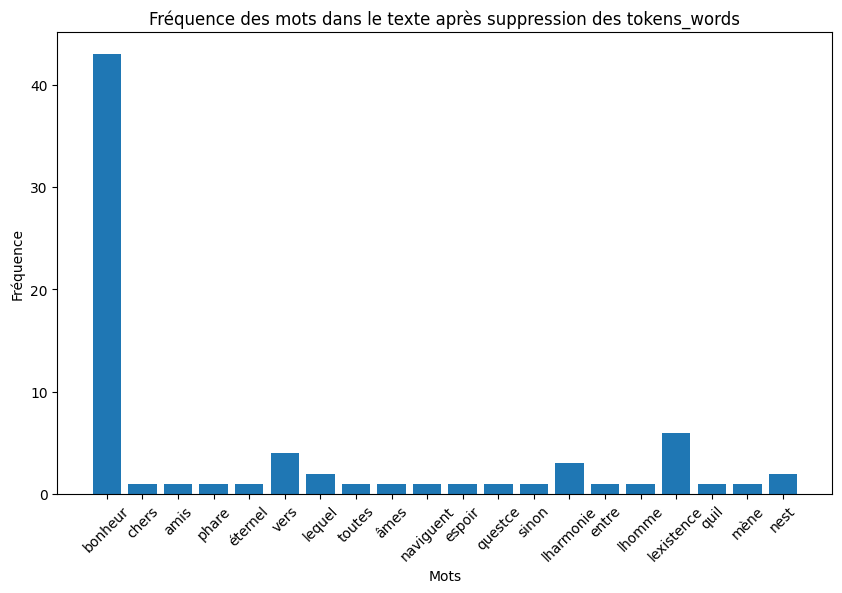

In [6]:
# Nettoyage des mots vides, retire les stops words de la liste des tokens_words
import string
from collections import Counter

import matplotlib.pyplot as plt

tokens_clean = [word for word in tokens_words if word.lower()
                not in stop_words]
# Affiche les 20 premiers mots nettoyés pour vérification
print(f"\n Tokens nettoyés:\n{tokens_clean} \n")

# suppression de la ponctuation avec string_ponctuation
# liste des ponctuations
# suppression ponctuation
liste_ponctuation = string.punctuation

print(f"\n liste_ponctuation:\n{liste_ponctuation} \n")
# liste en comprehension  prend chaque caractére de chaque mot de token_cleans s'il ne sont pas dans la liste des ponctuations, puis recreeé le mot avec le "".join
tokens_clean_ponctuation = [
    "".join(charactere for charactere in word if charactere not in liste_ponctuation)
    for word in tokens_clean
]

print(f"\n tokens_clean_ponctuation:\n{tokens_clean_ponctuation} \n")
# Suppression des espaces de la liste
tokens_clean_ponctuation_sans_espaces = [
    word for word in tokens_clean_ponctuation if len(word) > 1]

# sauve la liste preparée sans ponctuaction ni stop words
texte_sans_espaces_ni_ponctuation = pd.DataFrame(
    tokens_clean_ponctuation_sans_espaces, columns=["tokens"])
texte_sans_espaces_ni_ponctuation.to_csv(
    "texte_sans_espaces_ni_ponctuation.csv", index=False)


print(f"\n tokens_clean_ponctuation_sans_espaces:\n{
      tokens_clean_ponctuation_sans_espaces} \n")
# Compter la fréquence des mots
frequence_mots_clean_ponctuation_sans_espaces = Counter(
    tokens_clean_ponctuation_sans_espaces)
print(f"\n freq:\n{frequence_mots_clean_ponctuation_sans_espaces} \n")
# Préparer les données pour le graphique
frequence_mots = list(frequence_mots_clean_ponctuation_sans_espaces.keys())
frequences_valeur = list(
    frequence_mots_clean_ponctuation_sans_espaces.values())
print(f"\n mots:\n{frequence_mots} \n")
print(f"\n frequences:\n{frequences_valeur} \n")
# Créer un graphique en barres
plt.figure(figsize=(10, 6))
# Affiche les 20 premiers mots pour la lisibilité
plt.bar(frequence_mots[:20], frequences_valeur[:20])
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.title("Fréquence des mots dans le texte après suppression des tokens_words")
plt.xticks(rotation=45)
plt.show()


## Lemmatisation avec Spacy
Aprés analyse on remarque que word_tokenize ne gere pas les contractions dse mots francais par ex:
 "est-ce qu'il" donnera "estce" et "quil"
 "l'acceptaion" donnera "lacceptaion"
 On va donc passer par spacy qui supporte le francais

In [5]:
# !pip install spacy
# !python -m spacy download fr_core_news_sm


In [45]:
import string
from typing import Counter

import spacy

fichier_to_test = "./le_bonheur.txt"
print(f"\n fichier_to_test :\n{fichier_to_test} \n")

# Lire le fichier
with open(fichier_to_test, "r", encoding="utf-8") as file:
    fichier_to_test = file.read()

# traitement du texte avec spaCy
# Charger le modèle français
nlp = spacy.load("fr_core_news_sm")

# Tokeniser le texte
tokens_texte = nlp(fichier_to_test)
print(f"\n tokens_texte:\n{tokens_texte} \n")

# Afficher les tokens
tokens_words = [token.text for token in tokens_texte]
print(f"\n tokens_words:\n{tokens_words} \n")

# Création de la liste des stop words
stop_words = set(stopwords.words("french"))
print(f"\n stop_words:\n{stop_words} \n")
# Nettoyage des mots vides, retire les stop words de la liste des tokens_words
tokens_clean = [word for word in tokens_words if word.lower()
                not in stop_words]
# Affiche les 20 premiers mots nettoyés pour vérification
print(f"\n Tokens nettoyés:\n{tokens_clean} \n")

# suppression de la ponctuation avec string_ponctuation
liste_ponctuation = string.punctuation
print(f"\n liste_ponctuation:\n{liste_ponctuation} \n")
# liste en comprehension  prend chaque caractére de chaque mot de token_cleans s'il ne sont pas dans la liste des ponctuations, puis recreeé le mot avec le "".join
tokens_clean_ponctuation = [
    "".join(charactere for charactere in word if charactere not in liste_ponctuation)
    for word in tokens_clean
]

print(f"\n tokens_clean_ponctuation:\n{tokens_clean_ponctuation} \n")

# Suppression des espaces de la liste
tokens_clean_ponctuation_sans_espaces = [
    word for word in tokens_clean_ponctuation if len(word) > 1]
print(f"\n tokens_clean_ponctuation_sans_espaces:\n{
      tokens_clean_ponctuation_sans_espaces} \n")

# Nouvelle suppression des stop words car on voit qu'il en reste
tokens_clean_ponctuation_sans_espaces2 = [
    word for word in tokens_clean_ponctuation_sans_espaces if word not in stop_words
]
print(f"\n tokens_clean_ponctuation_sans_espaces2:\n{
      tokens_clean_ponctuation_sans_espaces2} \n")

# sauve la liste preparée avec scpacy
texte_sans_espaces_ni_ponctuation = pd.DataFrame(
    tokens_clean_ponctuation_sans_espaces2, columns=["tokens"])
texte_sans_espaces_ni_ponctuation.to_csv(
    "texte_sans_espaces_ni_ponctuation_spacy.csv", index=False)

# Compter la fréquence des mots
frequence_mots_clean_ponctuation_sans_espaces = Counter(
    tokens_clean_ponctuation_sans_espaces2)
print(f"\n freq:\n{frequence_mots_clean_ponctuation_sans_espaces} \n")
# Préparer les données pour le graphique
frequence_mots = list(frequence_mots_clean_ponctuation_sans_espaces.keys())
frequences_valeur = list(
    frequence_mots_clean_ponctuation_sans_espaces.values())
print(f"\n mots:\n{frequence_mots} \n")
print(f"\n frequences:\n{frequences_valeur} \n")
# Créer un graphique en barres


# Créer un graphique en barres
fig = go.Figure(data=[go.Bar(x=frequence_mots[:20], y=frequences_valeur[:20])])

# Mettre à jour le layout
fig.update_layout(
    title_text="Fréquence des mots dans le texte après Lemmatisation spaCy",
    xaxis_title="Mots",
    yaxis_title="Fréquence",
)

fig.show()



 fichier_to_test :
./le_bonheur.txt 


 tokens_texte:
Le bonheur, mes chers amis, est ce phare éternel vers lequel toutes les âmes naviguent avec espoir. Mais qu'est-ce que le bonheur, sinon l'harmonie entre l'homme et l'existence qu'il mène ? Ce n'est pas un lieu lointain ou un sommet à atteindre, mais plutôt un chemin sur lequel on marche, un ensemble de petits moments, une suite de respirations conscientes.

Socrate, dans son humilité, nous a enseigné que la connaissance de soi est la clé de la sagesse et, par extension, du bonheur. Car en se connaissant, on comprend mieux ses désirs et on distingue les plaisirs éphémères des joies durables.

Épicure, quant à lui, a souligné l'importance des plaisirs simples : le chant des oiseaux, la douceur d'une brise, la compagnie d'un bon ami. Il nous a invités à chercher le bonheur dans la modération et dans la liberté des tourments de l'âme.

Et que dire de Sénèque, ce stoïcien qui a prôné la vertu, la patience et l'acceptation ? Le bonheur 

# Quete2 NLP 2 - Stemming & Lemmatizing

Tu vas reprendre ton notebook de la quête précédente, puis effectuer les étapes ci-dessous.

A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un stemmer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist. Le stemmer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?
A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un lemmatizer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist. Le lemmatizer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?
Attention, pour cette seconde étape, repars du texte nettoyé, mais pas du texte après stemmer. Le but de cet exercice est de comparer les deux méthodes

Compare les deux méthodes : les mots avec les plus grandes valeurs dans le FreqDist sont-ils les mêmes ?
Partage le lien vers ton notebook en guise de solution au challenge.

In [7]:
import os
from nltk.probability import FreqDist

# repertoire de travail actuel
path = os.getcwd()
print(f"\n path:\n{path} \n")
print(os.getcwd())
# Charger le DataFrame à partir du fichier CSV
df = pd.read_csv("texte_sans_espaces_ni_ponctuation.csv")
# on ne garde pas les lignes \n\n
df = df[df['tokens'] != "\n\n"]
tokens = df['tokens'].tolist()
tokens



 path:
n:\programmation\WildCodeSchool\Formation_IA_DATA_nov2023\quêtes\Semaine10 

n:\programmation\WildCodeSchool\Formation_IA_DATA_nov2023\quêtes\Semaine10


['bonheur',
 'chers',
 'amis',
 'phare',
 'éternel',
 'vers',
 'lequel',
 'toutes',
 'âmes',
 'naviguent',
 'espoir',
 'questce',
 'bonheur',
 'sinon',
 'lharmonie',
 'entre',
 'lhomme',
 'lexistence',
 'quil',
 'mène',
 'nest',
 'lieu',
 'lointain',
 'sommet',
 'atteindre',
 'plutôt',
 'chemin',
 'lequel',
 'marche',
 'ensemble',
 'petits',
 'moments',
 'suite',
 'respirations',
 'conscientes',
 'Socrate',
 'humilité',
 'enseigné',
 'connaissance',
 'soi',
 'clé',
 'sagesse',
 'extension',
 'bonheur',
 'Car',
 'connaissant',
 'comprend',
 'mieux',
 'désirs',
 'distingue',
 'plaisirs',
 'éphémères',
 'joies',
 'durables',
 'Épicure',
 'quant',
 'souligné',
 'limportance',
 'plaisirs',
 'simples',
 'chant',
 'oiseaux',
 'douceur',
 'dune',
 'brise',
 'compagnie',
 'dun',
 'bon',
 'ami',
 'invités',
 'chercher',
 'bonheur',
 'modération',
 'liberté',
 'tourments',
 'lâme',
 'dire',
 'Sénèque',
 'stoïcien',
 'prôné',
 'vertu',
 'patience',
 'lacceptation',
 'bonheur',
 'nest',
 'labsence'

## Stemmatisation avec SnowballStemmer

In [47]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("french")
tokens_stemmed = [stemmer.stem(word) for word in tokens]
print(f"\n tokens_stemmed:\n{tokens_stemmed} \n")

# fréquence
freq_dist_stem = FreqDist(tokens_stemmed)
print(f"\n freq_dist_stem:\n{freq_dist_stem} \n")
#  les 10 mots les plus courants
tokens_stemmed_plus_courant = freq_dist_stem.most_common(10)
print(f"\n tokens_stemmed_plus_courant:\n{tokens_stemmed_plus_courant} \n")

# sauve la liste preparée avec SnowballStemmer
texte_sans_espaces_ni_ponctuation_SnowballStemmer = pd.DataFrame(
    tokens_stemmed, columns=["tokens"])
texte_sans_espaces_ni_ponctuation_SnowballStemmer.to_csv(
    "texte_sans_espaces_ni_ponctuation_SnowballStemmer.csv", index=False)



 tokens_stemmed:
['bonheur', 'cher', 'amis', 'phar', 'éternel', 'ver', 'lequel', 'tout', 'âme', 'naviguent', 'espoir', 'qu', 'ce', 'bonheur', 'sinon', 'harmon', 'entre', 'homm', 'existent', 'qu', 'men', 'lieu', 'lointain', 'sommet', 'atteindr', 'plutôt', 'chemin', 'lequel', 'march', 'ensembl', 'petit', 'moment', 'suit', 'respir', 'conscient', 'socrat', 'humil', 'enseign', 'connaiss', 'soi', 'clé', 'sagess', 'extens', 'bonheur', 'car', 'connaiss', 'comprend', 'mieux', 'désir', 'distingu', 'plaisir', 'éphémer', 'joi', 'durabl', 'épicur', 'quant', 'soulign', 'import', 'plaisir', 'simpl', 'chant', 'oiseau', 'douceur', 'bris', 'compagn', 'bon', 'ami', 'invit', 'cherch', 'bonheur', 'moder', 'libert', 'tourment', 'âme', 'dir', 'sénequ', 'stoïcien', 'prôn', 'vertu', 'patienc', 'accept', 'bonheur', 'absenc', 'souffranc', 'façon', 'dont', 'fait', 'fac', 'rappel', 'vagu', 'vi', 'doivent', 'être', 'navigu', 'courag', 'bonheur', 'souvent', 'fruit', 'capac', 'vouloir', 'contrôl', 'échapp', 'contrôl

### Graphique stemmer

In [43]:
# Préparer les données pour le graphique
mots_stemming = [word for word, freq in tokens_stemmed_plus_courant]
frequences_stemming = [freq for word, freq in tokens_stemmed_plus_courant]

# Créer un graphique en barres
fig_stemming = go.Figure(data=[go.Bar(x=mots_stemming, y=frequences_stemming)])

# Mettre à jour le layout
fig_stemming.update_layout(
    title_text="Fréquence des mots après Stemmatisation SnowballStemmer",
    xaxis_title="Mots",
    yaxis_title="Fréquence",
)

fig_stemming.show()


## Lemmatisation avec Textblob

In [41]:
# pour une stemmatisation avec texblob
!pip install textblob
!pip install textblob_fr
!pip install pattern



  Using cached textblob_fr-0.2.0-py2.py3-none-any.whl (561 kB)


In [48]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

# Charger le DataFrame à partir du fichier CSV
df = pd.read_csv("texte_sans_espaces_ni_ponctuation.csv")
# on ne garde pas les lignes \n\n
df = df[df['tokens'] != "\n\n"]
print(f"\n df:\n{df} \n")
tokens = df['tokens'].tolist()
print(f"\n tokens:\n{tokens} \n")

# Assurez-vous que vos tokens sont dans une chaîne de caractères cohérente
texte = " ".join(tokens)  # 'tokens' est votre liste de mots nettoyés
print(f"\n texte:\n{texte} \n")
# Créer un objet TextBlob pour le texte en français
blob = TextBlob(texte, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
print(f"\n blob:\n{blob} \n")

# Lemmatisation (cette méthode n'est pas aussi robuste que SpaCy pour le français)
tokens_lemmatized = [word.lemma for word in blob.words]
print(f"\n tokens_lemmatized:\n{tokens_lemmatized} \n")

# sauve la liste preparée avec TextBlob
texte_sans_espaces_ni_ponctuation_TextBlob = pd.DataFrame(
    tokens_lemmatized, columns=["tokens"])
texte_sans_espaces_ni_ponctuation_TextBlob.to_csv(
    "texte_sans_espaces_ni_ponctuation_TextBlob.csv", index=False)

# Fréquence des mots après lemmatisation
freq_dist_lemma = FreqDist(tokens_lemmatized)
print(f"\n freq_dist_lemma:\n{freq_dist_lemma} \n")

# Les 10 mots les plus courants après lemmatisation
tokens_lemmatized_plus_courant = freq_dist_lemma.most_common(10)
print(f"\n tokens_lemmatized_plus_courant:\n{
      tokens_lemmatized_plus_courant} \n")


# Préparer les données pour le graphique
mots_lemming = [word for word, freq in tokens_lemmatized_plus_courant]
frequences_lemming = [freq for word, freq in tokens_lemmatized_plus_courant]

# Créer un graphique en barres
fig_stemming = go.Figure(data=[go.Bar(x=mots_lemming, y=frequences_lemming)])

# Mettre à jour le layout
fig_stemming.update_layout(
    title_text="Fréquence des mots après lemmatisation textBlob",
    xaxis_title="Mots",
    yaxis_title="Fréquence",
)

fig_stemming.show()



 df:
            tokens
0          bonheur
1            chers
2             amis
3            phare
4          éternel
..             ...
553  contemplation
554     esthétique
555     compassion
556     modération
557         désirs

[538 rows x 1 columns] 


 tokens:
['bonheur', 'chers', 'amis', 'phare', 'éternel', 'vers', 'lequel', 'toutes', 'âmes', 'naviguent', 'espoir', 'qu', 'ce', 'bonheur', 'sinon', 'harmonie', 'entre', 'homme', 'existence', 'qu', 'mène', 'lieu', 'lointain', 'sommet', 'atteindre', 'plutôt', 'chemin', 'lequel', 'marche', 'ensemble', 'petits', 'moments', 'suite', 'respirations', 'conscientes', 'Socrate', 'humilité', 'enseigné', 'connaissance', 'soi', 'clé', 'sagesse', 'extension', 'bonheur', 'Car', 'connaissant', 'comprend', 'mieux', 'désirs', 'distingue', 'plaisirs', 'éphémères', 'joies', 'durables', 'Épicure', 'quant', 'souligné', 'importance', 'plaisirs', 'simples', 'chant', 'oiseaux', 'douceur', 'brise', 'compagnie', 'bon', 'ami', 'invités', 'chercher', 'bonhe

# Quete 3  World Cloud
- Un WordCloud à partir du texte initial, grâce à la méthode generate_from_text

- Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation.

- Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation, et application d'un stemmer.

- Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation, et application d'un lemmatizer
 

In [ ]:
!pip install wordcloud


## WorldCLoud fichier initial


 fichier_to_test :
./le_bonheur.txt 



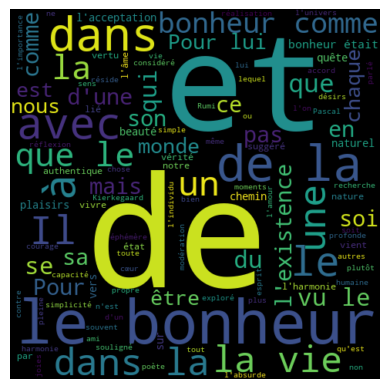

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


fichier_to_test = "./le_bonheur.txt"
print(f"\n fichier_to_test :\n{fichier_to_test} \n")

# Lire le fichier
with open(fichier_to_test, "r", encoding="utf-8") as file:
    texte = file.read()
wordcloud = WordCloud(width=480, height=480,
                      max_font_size=200, min_font_size=10)

# Génération du wordcloud depuis un texte
wordcloud.generate_from_text(texte)

# Affichage grâce à Matplotlib
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


## WorldCLoud fichier sans espace ni ponctuation ni stopword

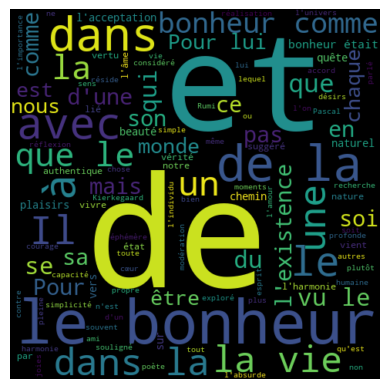

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger le DataFrame à partir du fichier CSV
df = pd.read_csv("texte_sans_espaces_ni_ponctuation.csv")
# on ne garde pas les lignes \n\n
df = df[df['tokens'] != "\n\n"]
# print(f"\n df:\n{df} \n")
tokens = df['tokens'].tolist()
# print(f"\n tokens:\n{tokens} \n")

# fichier_to_test = "./texte_sans_espaces_ni_ponctuation.csv"
# print(f"\n fichier_to_test :\n{fichier_to_test} \n")
# # Lire le fichier
# with open(fichier_to_test, "r", encoding="utf-8") as file:
#     texte = file.read()

# Calcul de la fréquence des mots après stemming
freq_dist_stem = FreqDist(tokens)

# Générer un WordCloud
wordcloud_stem = WordCloud(width=800, height=800,
                           background_color='white').generate_from_frequencies(freq_dist_stem)

# Affichage grâce à Matplotlib
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


## WorldCLoud fichier spaCy

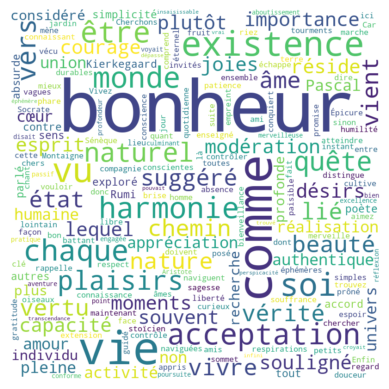

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger le DataFrame à partir du fichier CSV
df = pd.read_csv("texte_sans_espaces_ni_ponctuation_spacy.csv")
# on ne garde pas les lignes \n\n
df = df[df['tokens'] != "\n\n"]
# print(f"\n df:\n{df} \n")
tokens_spacy = df['tokens'].tolist()
# print(f"\n tokens:\n{tokens} \n")

# fichier_to_test = "./texte_sans_espaces_ni_ponctuation.csv"
# print(f"\n fichier_to_test :\n{fichier_to_test} \n")
# # Lire le fichier
# with open(fichier_to_test, "r", encoding="utf-8") as file:
#     texte = file.read()

# Calcul de la fréquence des mots après stemming
freq_dist_spacy = FreqDist(tokens_spacy)

# Générer un WordCloud
wordcloud_spacy = WordCloud(width=800, height=800,
                            background_color='white').generate_from_frequencies(freq_dist_spacy)

# Affichage grâce à Matplotlib
plt.figure()
plt.imshow(wordcloud_spacy, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



 fichier_to_test :
./texte_sans_espaces_ni_ponctuation_spacy.csv 



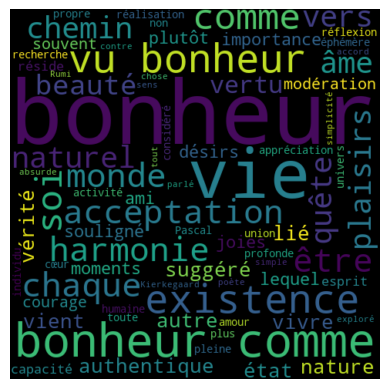

In [14]:
# fichier_to_test = "./texte_sans_espaces_ni_ponctuation_spacy.csv"
# print(f"\n fichier_to_test :\n{fichier_to_test} \n")

# # Lire le fichier
# with open(fichier_to_test, "r", encoding="utf-8") as file:
#     texte = file.read()
# wordcloud = WordCloud(width=480, height=480,
#                       max_font_size=200, min_font_size=10)

# # Génération du wordcloud depuis un texte
# wordcloud.generate_from_text(texte)

# # Affichage grâce à Matplotlib
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.margins(x=0, y=0)
# plt.show()


## WorldCLoud fichier TextBlob

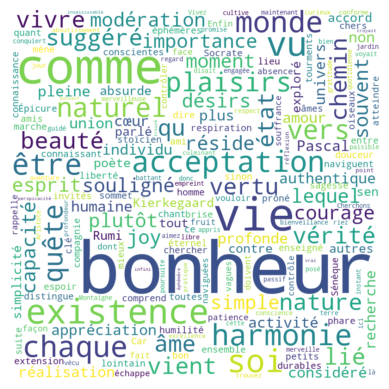

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger le DataFrame à partir du fichier CSV
df = pd.read_csv("texte_sans_espaces_ni_ponctuation_TextBlob.csv")
# on ne garde pas les lignes \n\n
df = df[df['tokens'] != "\n\n"]
# print(f"\n df:\n{df} \n")
tokens_textblob = df['tokens'].tolist()
# print(f"\n tokens:\n{tokens} \n")

# Calcul de la fréquence des mots après stemming
freq_dist_textblob = FreqDist(tokens_textblob)

# Générer un WordCloud
wordcloud_textblob = WordCloud(width=800, height=800,
                               background_color='white').generate_from_frequencies(freq_dist_textblob)

# Affichage grâce à Matplotlib
plt.figure()
plt.imshow(wordcloud_textblob, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


## WorldCLoud fichier SnowballStemmer

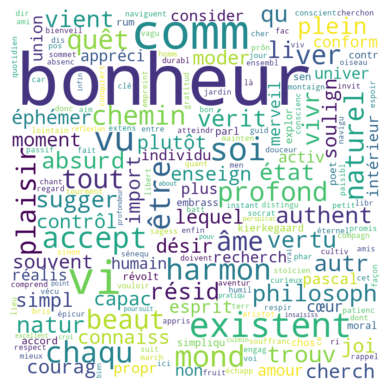

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger le DataFrame à partir du fichier CSV
df = pd.read_csv("texte_sans_espaces_ni_ponctuation_SnowballStemmer.csv")
# on ne garde pas les lignes \n\n
df = df[df['tokens'] != "\n\n"]
# print(f"\n df:\n{df} \n")
tokens_snow = df['tokens'].tolist()
# print(f"\n tokens:\n{tokens} \n")

# Calcul de la fréquence des mots après stemming
freq_dist_snow = FreqDist(tokens_snow)

# Générer un WordCloud
wordcloud_snow = WordCloud(width=800, height=800,
                           background_color='white').generate_from_frequencies(freq_dist_snow)

# Affichage grâce à Matplotlib
plt.figure()
plt.imshow(wordcloud_snow, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
